# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
%pip install labelme tensorflow  opencv-python matplotlib albumentations

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 1.4 MB/s eta 0:00:0000:0100:02
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.5.0 which is incompatible.
tensorflow-macos 2.13.0 requires numpy<=1.24.3,>=1.22, but you

### 1.2 Collect Images Using OpenCV

In [7]:
import os
import time
import uuid
import cv2 # type: ignore

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    # cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2024-09-12 12:54:49.874 Python[4564:46836] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


### 1.3 Annotate Images with LabelMe

In [ ]:
pip install labelme

In [22]:
!labelme

2024-09-12 12:58:21,486 [INFO   ] __init__:get_config:67- Loading config file from: /Users/princeninama/.labelmerc
2024-09-12 12:58:21.895 Python[4675:50138] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
2024-09-12 13:01:41,364 [INFO   ] app:deleteFile:1979- Label file is removed: /Users/princeninama/Downloads/vs/FACE DETECTION/FaceDetection-main/data/images/1f2c1fb0-70d8-11ef-8135-a6f2f6925d9e.json


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [1]:
import tensorflow as tf # type: ignore
import json
import numpy as np # type: ignore
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2.3 Load Image into TF Data Pipeline

In [8]:
images = tf.data.Dataset.list_files(os.path.join('data','images','*jpg'))

2024-09-12 13:50:25.701765: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-12 13:50:25.701849: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-09-12 13:50:25.701857: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-09-12 13:50:25.701889: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 13:50:25.701928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
image_files_path = os.path.join('data', 'images', '*.jpg')

# Create a TensorFlow dataset with the image files
images = tf.data.Dataset.list_files(image_files_path)

In [10]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [11]:
images = images.map(load_image)

In [12]:
images.as_numpy_iterator().next()

array([[[215, 216, 200],
        [214, 215, 199],
        [213, 214, 198],
        ...,
        [252, 254, 251],
        [252, 254, 251],
        [252, 254, 251]],

       [[215, 216, 200],
        [215, 216, 200],
        [215, 216, 200],
        ...,
        [251, 253, 250],
        [251, 253, 250],
        [251, 253, 250]],

       [[216, 217, 203],
        [216, 217, 203],
        [216, 217, 203],
        ...,
        [251, 253, 250],
        [251, 253, 250],
        [251, 253, 250]],

       ...,

       [[186, 180, 168],
        [186, 180, 168],
        [186, 180, 168],
        ...,
        [ 54,  67,  76],
        [ 55,  68,  77],
        [ 48,  61,  70]],

       [[187, 181, 169],
        [187, 181, 169],
        [186, 180, 168],
        ...,
        [ 57,  70,  79],
        [ 56,  69,  78],
        [ 57,  70,  79]],

       [[187, 181, 169],
        [187, 181, 169],
        [187, 181, 169],
        ...,
        [ 56,  69,  78],
        [ 62,  75,  84],
        [ 59,  72,  81]]

In [13]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [14]:
image_generator = images.batch(4).as_numpy_iterator()

In [15]:
plot_images = image_generator.next()

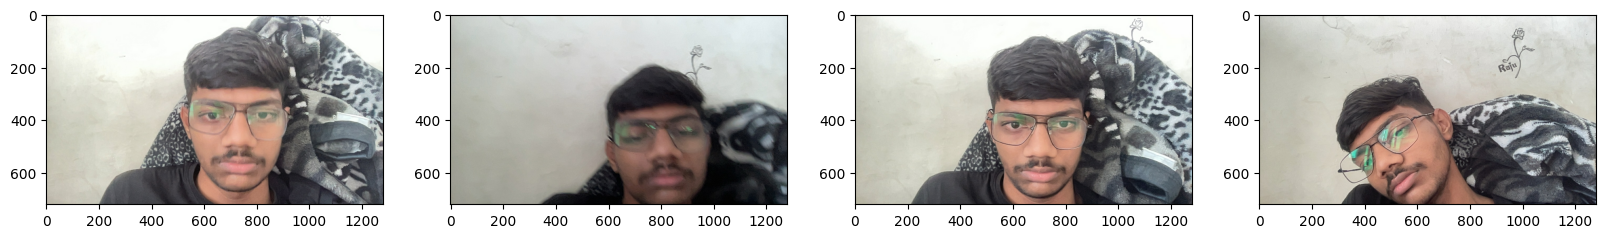

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [17]:
90*.7 # 63 to train

62.99999999999999

In [18]:
90*.15 # 14 and 13 to test and val

13.5

### 3.2 Move the Matching Labels

In [20]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [76]:
import albumentations as alb

In [77]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [78]:
img = cv2.imread(os.path.join('data','train', 'images','1c271aa4-70d8-11ef-8135-a6f2f6925d9e.jpg'))

In [79]:
height, width = img.shape[:2]

In [80]:
with open(os.path.join('data', 'train', 'labels', '1c271aa4-70d8-11ef-8135-a6f2f6925d9e.json'), 'r') as f:
    label = json.load(f)

In [81]:
label['shapes'][0]['points']

[[462.28260869565224, 149.67391304347822],
 [931.8478260869565, 711.6304347826086]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [82]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [83]:
coords

[462.28260869565224, 149.67391304347822, 931.8478260869565, 711.6304347826086]

In [84]:
coords = list(np.divide(coords, [width, height, width, height]))

In [85]:
coords

[0.3611582880434783,
 0.20788043478260865,
 0.7280061141304348,
 0.9883756038647342]

### 4.4 Apply Augmentations and View Results

In [86]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [87]:
augmented

{'image': array([[[250, 255, 254],
         [250, 255, 254],
         [250, 255, 254],
         ...,
         [ 88,  82,  87],
         [ 86,  80,  85],
         [ 78,  72,  77]],
 
        [[250, 255, 254],
         [250, 255, 254],
         [250, 255, 254],
         ...,
         [ 81,  75,  80],
         [ 84,  78,  83],
         [ 80,  74,  79]],
 
        [[250, 255, 254],
         [250, 255, 254],
         [250, 255, 254],
         ...,
         [ 89,  84,  86],
         [ 83,  78,  80],
         [ 82,  77,  79]],
 
        ...,
 
        [[ 87,  77,  77],
         [ 81,  71,  71],
         [ 73,  63,  63],
         ...,
         [ 69,  82, 120],
         [ 85,  98, 136],
         [ 82,  95, 133]],
 
        [[ 82,  73,  70],
         [ 69,  60,  57],
         [ 64,  55,  52],
         ...,
         [ 72,  84, 120],
         [ 78,  91, 129],
         [ 79,  92, 130]],
 
        [[ 77,  68,  65],
         [ 63,  54,  51],
         [ 48,  39,  36],
         ...,
         [ 81,  93,

In [88]:
augmented['bboxes']

[(0.7336714975845411, 0.0, 1.0, 1.0)]

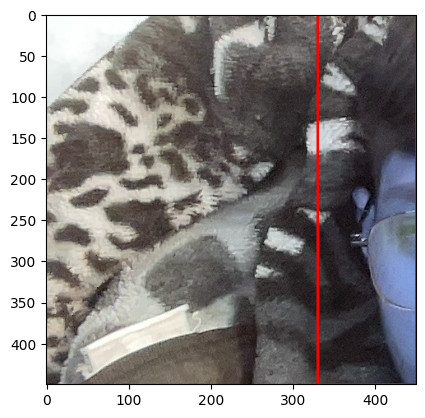

In [89]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [98]:

for partition in ['train', 'test', 'val']: 
    for image_name in os.listdir(os.path.join('data', partition, 'images')):
        img_path = os.path.join('data', partition, 'images', image_name)
        img = cv2.imread(img_path)

        # Check if the image is loaded correctly
        if img is None:
            print(f"Failed to read image {image_name}")
            continue

        # Initialize default coordinates
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image_name.split(".")[0]}.json')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0] / img.shape[1]  # Normalize to image width
            coords[1] = label['shapes'][0]['points'][0][1] / img.shape[0]  # Normalize to image height
            coords[2] = label['shapes'][0]['points'][1][0] / img.shape[1]  # Normalize to image width
            coords[3] = label['shapes'][0]['points'][1][1] / img.shape[0]  # Normalize to image height

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                augmented_image = augmented['image']
                
                # Save augmented image
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image_name.split(".")[0]}.{x}.jpg'), augmented_image)

                annotation = {}
                annotation['image'] = image_name

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0 

                # Save annotation
                with open(os.path.join('aug_data', partition, 'labels', f'{image_name.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f"Error processing {image_name}: {e}")


Failed to read image .DS_Store
Failed to read image .DS_Store
Failed to read image .DS_Store


### 5.2 Load Augmented Images to Tensorflow Dataset

In [99]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [100]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [101]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [102]:
train_images.as_numpy_iterator().next()

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99442405, 0.996875  , 0.996875  ],
        [0.99509805, 0.99509805, 0.99509805],
        [0.9970588 , 1.        , 0.99558824]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 0.99895835, 0.990625  ],
        [0.9939951 , 0.99356616, 0.99172795],
        [0.9983456 , 1.        , 0.9998162 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.89981616, 0.88033086, 0.85857844],
        [1.        , 0.99828434, 0.9898897 ],
        [0.99852943, 1.        , 1.        ]],

       ...,

       [[0.5707108 , 0.5707108 , 0.56286764],
        [0.6343137 , 0.6343137 , 0.6343137 ],
        [0.70275736, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [103]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [105]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [107]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [108]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [109]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.658 , 0.1569, 1.    , 1.    ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [110]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1260, 1260, 360, 360, 180, 180)

### 7.2 Create Final Datasets (Images/Labels)

In [111]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [112]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [113]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [114]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.543  , 0.4622 , 1.     , 1.     ],
        [0.02063, 0.1793 , 1.     , 1.     ],
        [0.383  , 0.     , 1.     , 0.871  ],
        [0.5723 , 0.     , 1.     , 0.858  ],
        [0.     , 0.1667 , 0.1246 , 1.     ],
        [0.     , 0.     , 0.8706 , 0.994  ],
        [0.7495 , 0.     , 1.     , 0.933  ],
        [0.     , 0.     , 0.287  , 1.     ]], dtype=float16))

### 7.3 View Images and Annotations

In [115]:
data_samples = train.as_numpy_iterator()

In [118]:
res = data_samples.next()
res

(array([[[[0.91764706, 0.9254902 , 0.90588236],
          [0.91403186, 0.9336397 , 0.9101103 ],
          [0.91813725, 0.9259804 , 0.90637255],
          ...,
          [0.8279412 , 0.847549  , 0.8240196 ],
          [0.85036767, 0.8699755 , 0.8464461 ],
          [0.8401961 , 0.85      , 0.82892156]],
 
         [[0.92009807, 0.9279412 , 0.90833336],
          [0.9141544 , 0.93376225, 0.91023284],
          [0.9211397 , 0.92898285, 0.909375  ],
          ...,
          [0.8627451 , 0.87058824, 0.8509804 ],
          [0.8487132 , 0.85655636, 0.8369485 ],
          [0.84552693, 0.8509191 , 0.8288603 ]],
 
         [[0.91764706, 0.9254902 , 0.90588236],
          [0.9136642 , 0.93327206, 0.90974265],
          [0.9147059 , 0.922549  , 0.90294117],
          ...,
          [0.8319853 , 0.83982843, 0.8202206 ],
          [0.83045346, 0.8382966 , 0.81868875],
          [0.8364583 , 0.8418505 , 0.8197917 ]],
 
         ...,
 
         [[0.6958333 , 0.532598  , 0.44142157],
          [0.68511

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


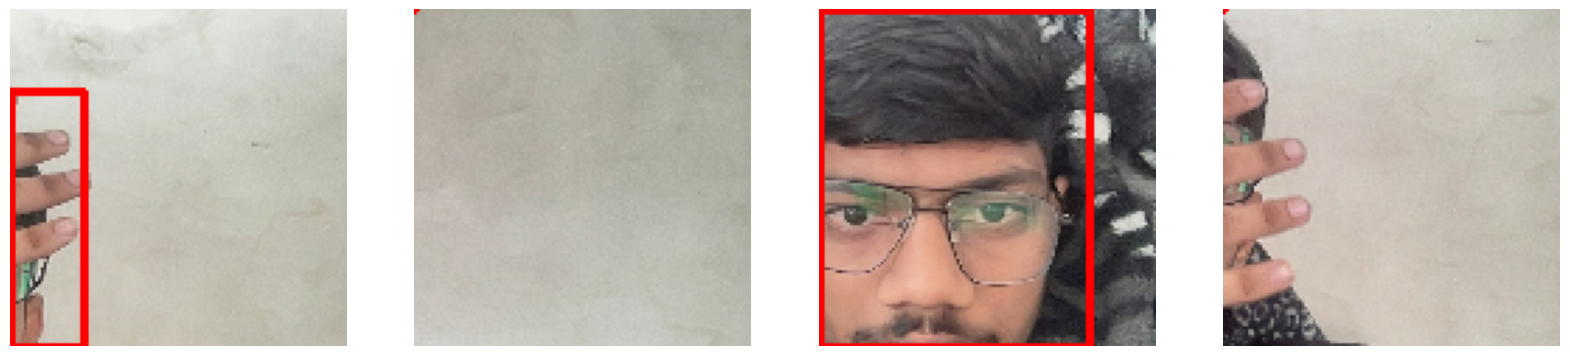

In [119]:

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    sample_image = np.copy(res[0][idx])  # Create a writable copy of the image
    sample_coords = res[1][1][idx]
    
    # Convert coordinates to integer pixel values
    top_left = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
    bottom_right = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))
    
    # Draw rectangle on the image
    cv2.rectangle(sample_image, top_left, bottom_right, (255, 0, 0), 2)

    # Display image using matplotlib
    ax[idx].imshow(sample_image)
    ax[idx].axis('off')  # Hide axis for better visualization

plt.show()


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [122]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [127]:
import requests
response = requests.get('https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
print(response.status_code)


200


In [130]:
vgg = VGG16(include_top=False) 


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 39s 1us/step


In [131]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [132]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [133]:
facetracker = build_model()

In [134]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
X, y = train.as_numpy_iterator().next()

In [136]:
X.shape

(8, 120, 120, 3)

In [137]:
classes, coords = facetracker.predict(X)

2024-09-12 15:58:18.984852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [138]:
classes, coords

(array([[0.3426237 ],
        [0.4361331 ],
        [0.37488058],
        [0.41404262],
        [0.33681086],
        [0.386463  ],
        [0.37283146],
        [0.33862275]], dtype=float32),
 array([[0.6006926 , 0.3576893 , 0.49465424, 0.4970207 ],
        [0.65576065, 0.3986599 , 0.4385827 , 0.5337267 ],
        [0.5489866 , 0.38472864, 0.3591394 , 0.5171504 ],
        [0.5908838 , 0.33570978, 0.40427136, 0.5021396 ],
        [0.63039577, 0.4123855 , 0.41297737, 0.5980415 ],
        [0.61314046, 0.38205656, 0.36809707, 0.48785555],
        [0.5997027 , 0.53182167, 0.42866495, 0.5028798 ],
        [0.70534635, 0.360684  , 0.4566896 , 0.48683137]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [186]:

batches_per_epoch = len(train)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=batches_per_epoch,
    decay_rate=0.75,
    staircase=True
)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [187]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [188]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [189]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [190]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.9921665>

In [191]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9190282>

In [192]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.9921665>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [193]:

class FaceTracker(Model): 
    def __init__(self, eyetracker, **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            # Print shapes for debugging
            print(f"Shape of y[0]: {y[0].shape}")
            print(f"Shape of classes: {classes.shape}")
            print(f"Shape of y[1]: {y[1].shape}")
            print(f"Shape of coords: {coords.shape}")
            
            if y[0].shape != classes.shape:
                raise ValueError("Shape mismatch between y_true and predictions (classes).")
            if y[1].shape != coords.shape:
                raise ValueError("Shape mismatch between y_true and predictions (coords).")
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss + 0.5 * batch_classloss
            
        grad = tape.gradient(total_loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        # Print shapes for debugging
        print(f"Shape of y[0]: {y[0].shape}")
        print(f"Shape of classes: {classes.shape}")
        print(f"Shape of y[1]: {y[1].shape}")
        print(f"Shape of coords: {coords.shape}")
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [194]:
model = FaceTracker(facetracker)

In [195]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [196]:
logdir='logs'

In [203]:


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)


In [204]:
tf.config.run_functions_eagerly(True)


In [207]:
hist = model.fit(train, epochs=10, validation_data=val)


Epoch 1/10
Shape of y[0]: (8, 1)
Shape of classes: (8, 1)
Shape of y[1]: (8, 4)
Shape of coords: (8, 4)
  1/158 ━━━━━━━━━━━━━━━━━━━━ 7:15 3s/step - class_loss: 0.2579 - regress_loss: 2.6704 - total_loss: 2.7994Shape of y[0]: (8, 1)
Shape of classes: (8, 1)
Shape of y[1]: (8, 4)
Shape of coords: (8, 4)
  2/158 ━━━━━━━━━━━━━━━━━━━━ 1:38 632ms/step - class_loss: 0.4094 - regress_loss: 2.9591 - total_loss: 3.1638Shape of y[0]: (8, 1)
Shape of classes: (8, 1)
Shape of y[1]: (8, 4)
Shape of coords: (8, 4)
  3/158 ━━━━━━━━━━━━━━━━━━━━ 1:37 629ms/step - class_loss: 0.4747 - regress_loss: 3.3394 - total_loss: 3.5768Shape of y[0]: (8, 1)
Shape of classes: (8, 1)
Shape of y[1]: (8, 4)
Shape of coords: (8, 4)
  4/158 ━━━━━━━━━━━━━━━━━━━━ 1:36 629ms/step - class_loss: 0.4477 - regress_loss: 2.9384 - total_loss: 3.1623Shape of y[0]: (8, 1)
Shape of classes: (8, 1)
Shape of y[1]: (8, 4)
Shape of coords: (8, 4)
  5/158 ━━━━━━━━━━━━━━━━━━━━ 1:36 631ms/step - class_loss: 0.4695 - regress_loss: 2.8406 - 

### 10.3 Plot Performance

In [208]:
hist.history

{'class_loss': [0.2967953085899353,
  0.16814172267913818,
  0.03818143904209137,
  0.0020295383874326944,
  0.4022044539451599,
  0.017855698242783546,
  0.010510874912142754,
  0.03730425983667374,
  0.00902195181697607,
  0.8421467542648315],
 'regress_loss': [0.4888934791088104,
  0.43793731927871704,
  0.04293990507721901,
  0.17082977294921875,
  1.304418921470642,
  0.053996793925762177,
  0.017859647050499916,
  0.04013032466173172,
  0.01865125074982643,
  0.921366274356842],
 'total_loss': [0.6372911334037781,
  0.5220081806182861,
  0.062030624598264694,
  0.17184454202651978,
  1.5055211782455444,
  0.06292464584112167,
  0.023115083575248718,
  0.05878245458006859,
  0.023162227123975754,
  1.3424396514892578],
 'val_class_loss': [0.17540156841278076,
  0.13155397772789001,
  0.0276914294809103,
  0.0012706079287454486,
  0.3980260193347931,
  0.43929433822631836,
  0.013127915561199188,
  0.019471503794193268,
  0.005834175739437342,
  0.0325143039226532],
 'val_regress_l

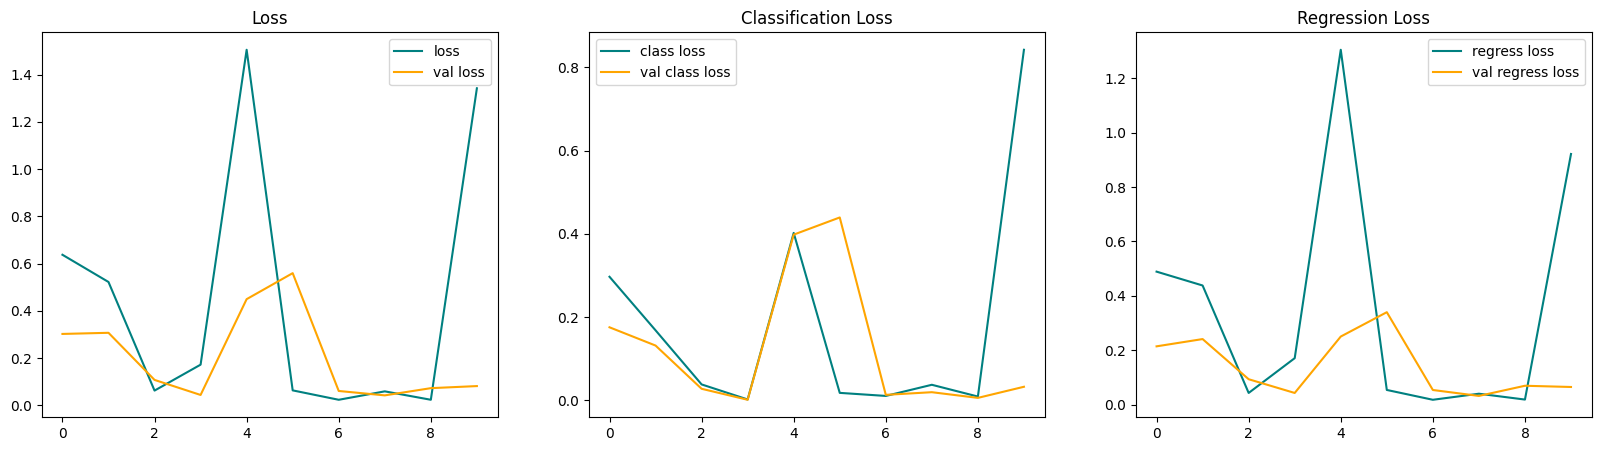

In [209]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [210]:
test_data = test.as_numpy_iterator()

In [211]:
test_sample = test_data.next()

In [212]:
yhat = facetracker.predict(test_sample[0])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


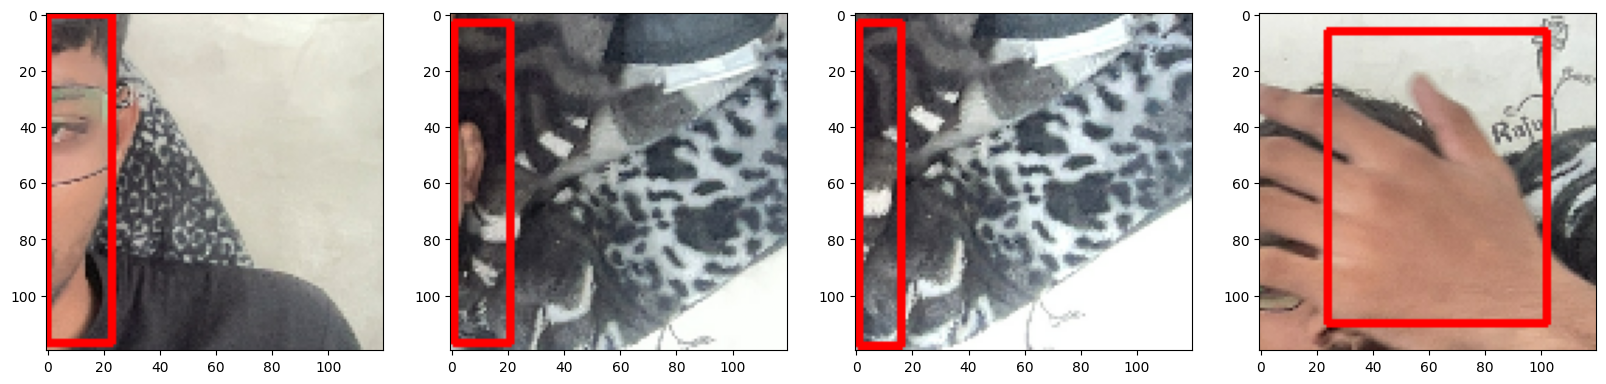

In [216]:

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    # Create a writable copy of the image for modification
    sample_image_copy = sample_image.copy()

    # Draw the rectangle if the condition is met
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image_copy, 
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
                      (255, 0, 0), 2)

    # Display the modified image
    ax[idx].imshow(sample_image_copy)

# Show the plot
plt.show()


### 11.2 Save the Model

In [217]:
from tensorflow.keras.models import load_model

In [218]:
facetracker.save('facetracker.h5')

In [219]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [221]:

# Initialize the video capture object
cap = cv2.VideoCapture(0)  # Try 0, 1, 2... depending on your device

if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    while cap.isOpened():
        _, frame = cap.read()
        
        # Check if frame is successfully captured
        if frame is None:
            print("Error: Failed to capture frame.")
            break
        
        frame = frame[50:500, 50:500, :]
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120, 120))
        
        yhat = facetracker.predict(np.expand_dims(resized/255, 0))
        sample_coords = yhat[1][0]
        
        if yhat[0] > 0.5:
            cv2.rectangle(frame,
                          tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                          (255, 0, 0), 2)
            cv2.rectangle(frame,
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [80, 0])),
                          (255, 0, 0), -1)
            cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('EyeTrack', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


2024-09-12 17:15:32.018 Python[5003:55010] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━